In [1]:
# .. ... .... .. .....

In [20]:
# import dependecies
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from tqdm import tqdm
import warnings
import matplotlib.pyplot as plt

In [3]:
# Set random seed for reproducibility
torch.manual_seed(42)
warnings.filterwarnings('ignore')

In [4]:
# Define the CNN autoencoder model
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # ENCODER
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(16, 8, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        # DECODER
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(8, 16, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, kernel_size=2, stride=2),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [5]:
# Prepare the MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)


In [14]:
# Initialize the model, loss function, and optimizer
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 10
pbar = tqdm(total = 9380, desc='Training', unit='batch')# total = num of epochs * len(trainloader)

for epoch in range(num_epochs):
    running_loss = 0.0
    for images, _ in trainloader:
        optimizer.zero_grad()
        reconstructions = model(images)
        loss = criterion(reconstructions, images)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        pbar.set_postfix({'Epoch': epoch+1, 'Loss': running_loss / (len(trainloader)*(epoch+1))})
        pbar.update(1)

        # Test the model


pbar.close()



Training: 100%|████| 9380/9380 [03:12<00:00, 48.70batch/s, Epoch=10, Loss=0.085]


In [15]:
# Test the model
model.eval()
with torch.no_grad():
    for images, _ in testloader:
        reconstructions = model(images)
        

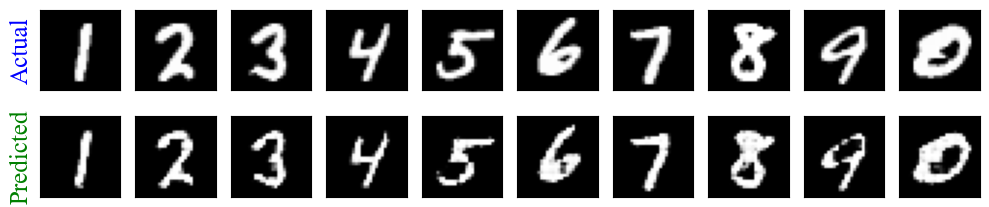

In [19]:
# Plot the actual and predicted images
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(10, 2.5))
for i in range(10):
    axes[0, i].imshow(images[i].squeeze().numpy(), cmap='gray')
    axes[0, i].set_xticks([])
    axes[0, i].set_yticks([])
    axes[1, i].imshow(reconstructions[i].squeeze().numpy(), cmap='gray')
    axes[1, i].set_xticks([])
    axes[1, i].set_yticks([])

axes[0, 0].set_ylabel('Actual', fontsize=18, fontname='times new roman', color='blue')
axes[1, 0].set_ylabel('Predicted', fontsize=18, fontname='times new roman', color = 'green')

plt.tight_layout()
plt.show()